In [13]:
from qiskit import QuantumCircuit       # to define the quantum circuit
from qiskit_aer import AerSimulator     # ideal simulator backend
from qiskit import transpile            # import the transpile function
from qiskit.transpiler import CouplingMap
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram

### Building the 5 qubit quantum computer Athens with linear connectivity #

In [14]:
architecture = CouplingMap([[0, 1], [1, 2], [2, 3], [3, 4], [4, 3], [3, 2], [2, 1], [1, 0]]) # custom architecture
gatesQcomp = ["id", "rz", "sx", "x", "cx"] # list of available gates in our custom quantum computer
customQcomputer = GenericBackendV2(5, gatesQcomp, coupling_map = architecture, noise_info=False)

### Define the circuit

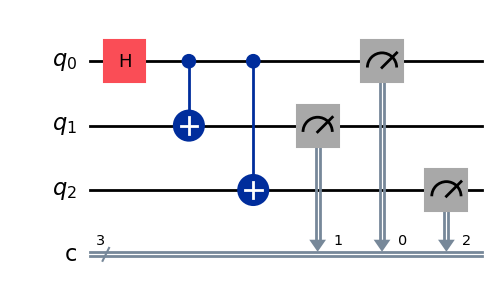

In [15]:
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw(output='mpl')

### Transpile the circuit with optimization level=0

c:\Users\Maio\anaconda3\envs\LabQC_2025\Lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x0000025128854AD0> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


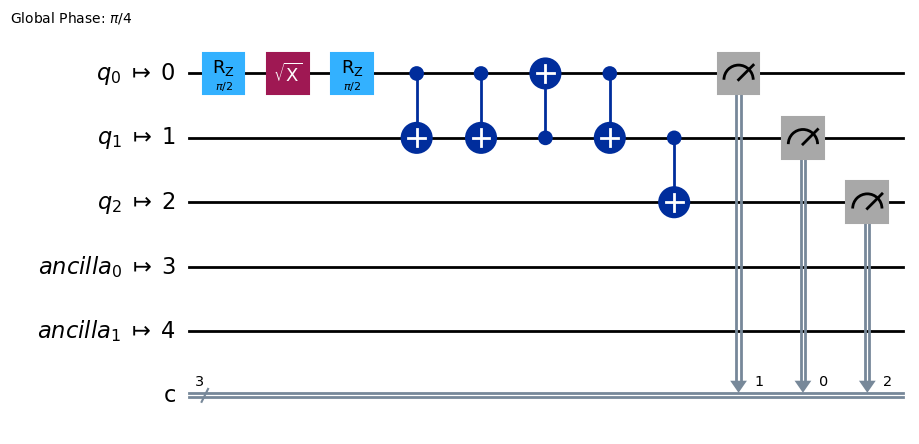

In [16]:
ourSim = AerSimulator.from_backend(customQcomputer)                 # initialize simulator with our custom backend
transpiledCirc = transpile(circ, ourSim, optimization_level = 0)  
transpiledCirc.draw(output='mpl')

### Run the simulator and get results

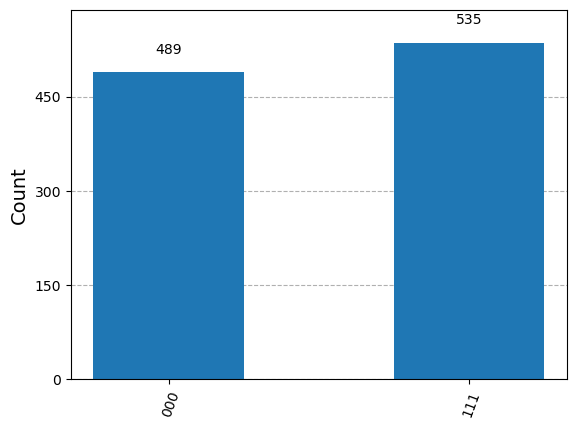

In [19]:
result = ourSim.run(transpiledCirc).result()
plot_histogram(result.get_counts())